### Notebook index

[3 Minimal examples](03-minimal.ipynb)  
[4 Plotting chromosomes](04-plotting.ipynb)   
[5 Multiple OTUs](05-multiple.ipynb)    
[6 Changing units](06-units.ipynb)  
[7 GISH](07-gish.ipynb)  
[8 Groups](08-groups.ipynb)  
[9 Circular Plots](09-circular.ipynb)  
[10 Plotting alongside phylogeny](10-phylogeny.ipynb)  
[11 Citrus](11-citrushelp.ipynb)  
[12 Human Karyotype](12-human.ipynb)  

# Human Karyotype

In [1]:
# General jupyter instructions

In [2]:
# press Ctrl + Enter to RUN active cell

# SHOW keyboard shortcuts Ctrl + M then H (only jupyter notebooks and colab)

# Ctrl + D (or X) DELETE a line of code

# press Ctrl + M to escape from cell (opposite to ENTER)

# then !
# B to ADD cell below or A above
# M to turn code cell into MARKDOWN
# Y turn markdown to CODE
# O to toggle OUTPUT
# D D to DELETE cell

# If in jupyter-lab:
# collapse cell clicking in the blue left bar
# use the settings menu to use the dark theme

# if in colab:
# remove bar at 80 in tools, preferences, 80 -> 0

In [3]:
# install if necessary

if (system.file(package = "idiogramFISH") == '') {
  install.packages("idiogramFISH")
}

library(idiogramFISH)

version 2.0.6 See help: ?idiogramFISH - browseVignettes('idiogramFISH') - https://ferroao.gitlab.io/manualidiogramfish



## Karyotype of 400 bands

Organize chr. in rows using column OTU. [@Adler1994]


In [4]:
library(idiogramFISH)
# Chromosome sizes for human
head(humChr) 

,chrName,group,shortArmSize,longArmSize
,<chr>,<chr>,<dbl>,<dbl>
1,1,A,5.600,5.890
2,2,A,4.245,6.715
3,3,A,4.220,4.720
4,4,B,2.240,6.165
5,5,B,2.110,5.920
6,6,C,2.880,4.835


</div>

<div class="verysmall">

</div>

<div class="fold s">

Arrange chr. groups as different OTUs (figure rows)

In [5]:
FstRow<-length(which(humChr$group %in% c("A","B") ) )        # groups in 1st row
SndRow<-length(which(humChr$group %in% "C" ) )               # groups in second row
TrdRow<-length(which(humChr$group %in% c("D","E") ) )        # groups in third row
FrtRow<-length(which(humChr$group %in% c("F","G","sex") ) )  # groups in forth row

OTUdf<-data.frame(OTU=c(rep("otu1",FstRow),
                        rep("otu2",SndRow),
                        rep("otu3",TrdRow),
                        rep("otu4",FrtRow)
), stringsAsFactors=FALSE # c
) # df

OTUdf$chrName<-humChr$chrName

humChr$OTU<-OTUdf$OTU

</div>

Add OTU info. to data.frame of marks' position

<div class="pre-scrollx">

In [6]:
# data.frame with marks' position
head(humMarkPos)  

,chrName,markName,chrRegion,markDistCen,markSize
,<chr>,<chr>,<chr>,<dbl>,<dbl>
2,1,chr1p36.3,p,5.290,0.310
3,1,chr1p36.2,p,5.100,0.190
4,1,chr1p36.1,p,4.680,0.420
5,1,chr1p35,p,4.435,0.245
6,1,chr1p34.3,p,4.270,0.165
7,1,chr1p34.2,p,4.110,0.160


</div>

<div class="verysmall">

</div>

<!-- <div class="pre-scrollx"> -->

In [7]:
humMarkPos$OTU<-OTUdf$OTU[match(humMarkPos$chrName, OTUdf$chrName)]

<!-- </div> -->

This is the data.frame of mark characteristics

<div class="pre-scrollx">

In [8]:
head(humMarkColor)

,markName,markColor,style
,<chr>,<chr>,<chr>
2,chr1p36.3,white,square
3,chr1p36.2,black,square
4,chr1p36.1,white,square
5,chr1p35,black,square
6,chr1p34.3,white,square
7,chr1p34.2,black,square


</div>

<div class="verysmall">

### Plot

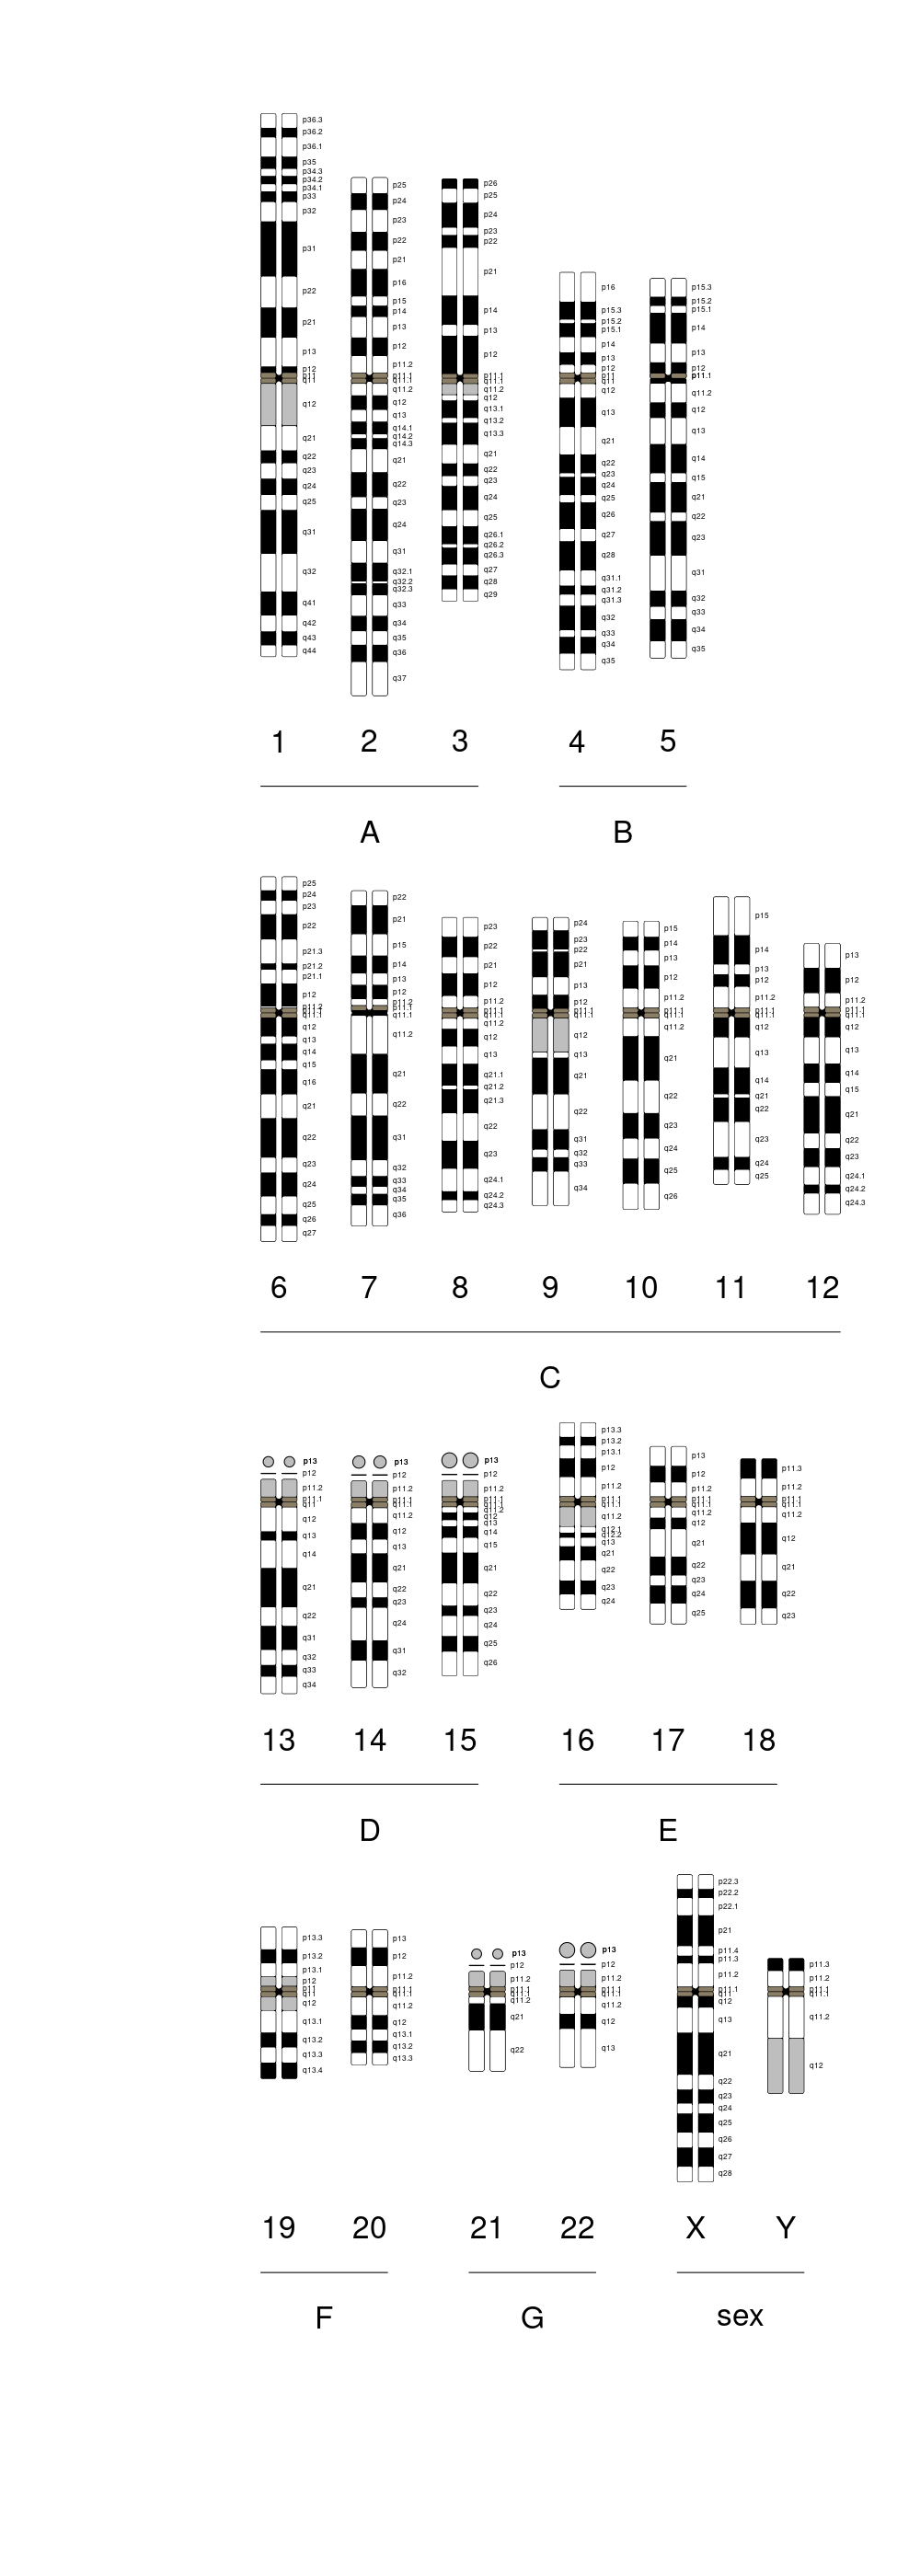

In [14]:
# fig.width=10, fig.height=28
par(mar=rep(0,4))

options(repr.plot.width = 10, repr.plot.height = 28, repr.plot.res = 100)

suppressMessages(
plotIdiograms(humChr,                     # data.frame of chromosome size (in package)
              dfMarkPos = humMarkPos,     # df of mark positions  (in package)
              dfMarkColor = humMarkColor, # df of mark characteristics (in package)
              
              addOTUName = FALSE,         # do not add name of OTU
              karHeight = 6,              # vertical size of kar.
              karHeiSpace = 7,            # vertical spacing among OTU
              chrWidth = .4,              # chr. width
              chrSpacing = .6,            # space among chr.
              classChrName = "",          # string for naming chr.
              orderChr = "group",         # order chr. by group name
              
              amoSepar = 2,               # reduce distance among OTUs
              karIndex = FALSE,           # do not add karyotype indices
              distTextChr = 1.5,          # distance from chr. to text.
              
              chrColor = "black",         # chr. color
              chrIndex = "",              # do not add chromosome indices
              morpho = "",                # do not add morphological categories
              
              autoCenSize = F,

              centromereSize = 0,         # apparent centromere size
              
              squareness = 10,            # squareness of chr. and marks
              legend = "inline",          # mark labels next to chr.
              markLabelSize = .5,         # size of legend font
              colorBorderMark = "black",  # force color of border of marks 
              pattern= "chr[0-9XY]+",     # REGEX pattern to remove from name of marks
              indexIdTextSize = 2,        # font size of chr name and indices
              lwd.chr=.5,                 # width of chr and mark borders
              
              ruler= FALSE,

              xlimRightMod = 0,           # space to the right of karyotype
              ylimBotMod = -.6            # modify ylim of bottom
              )
    )

## Robertsonian Translocations

This procedure transforms the data of long arms of the chromosomes 13 and 21 from data.frames of chr. and marks in a derivative [@Robertson1916].


In [10]:
# extract 13 data
humChr13<-humChr[which(humChr$chrName %in% 13),]
humMarkPos13<-humMarkPos[which(humMarkPos$chrName %in% 13),]

# extract 21 data
humChr21<-humChr[which(humChr$chrName %in% 21),]
humMarkPos21<-humMarkPos[which(humMarkPos$chrName %in% 21),]

# Making derivative data.frame of Marks

# remove p arm from 21
humMarkPos21Der<-humMarkPos21[humMarkPos21$chrRegion=="q",]
humMarkPos21Der$chrRegion<-"p"

# remove p arm from 13
humMarkPos13Der<-humMarkPos13[humMarkPos13$chrRegion=="q",]

# rename fragments
humMarkPos21Der$chrName<-"t(13;21)"
humMarkPos13Der$chrName<-"t(13;21)"

# merge fragments of Marks
humMarkPosDer<-rbind(humMarkPos21Der,humMarkPos13Der)

# Making derivative data.frame of chr. size

humChrDer<-humChr13
humChrDer$shortArmSize<-humChr21$longArmSize
humChrDer$chrName<-"t(13;21)"

# Make data.frame of chr. to plot
humChr1321der<-rbind(humChr13, humChrDer , humChr21)
humChr1321der<-humChr1321der[,c("chrName","shortArmSize","longArmSize"),]

# marks for them, together:
humMarkPos1321Der<-rbind(humMarkPos13, humMarkPos21, humMarkPosDer)
humMarkPos1321Der$OTU<-NULL

### plot of t(13;21) 

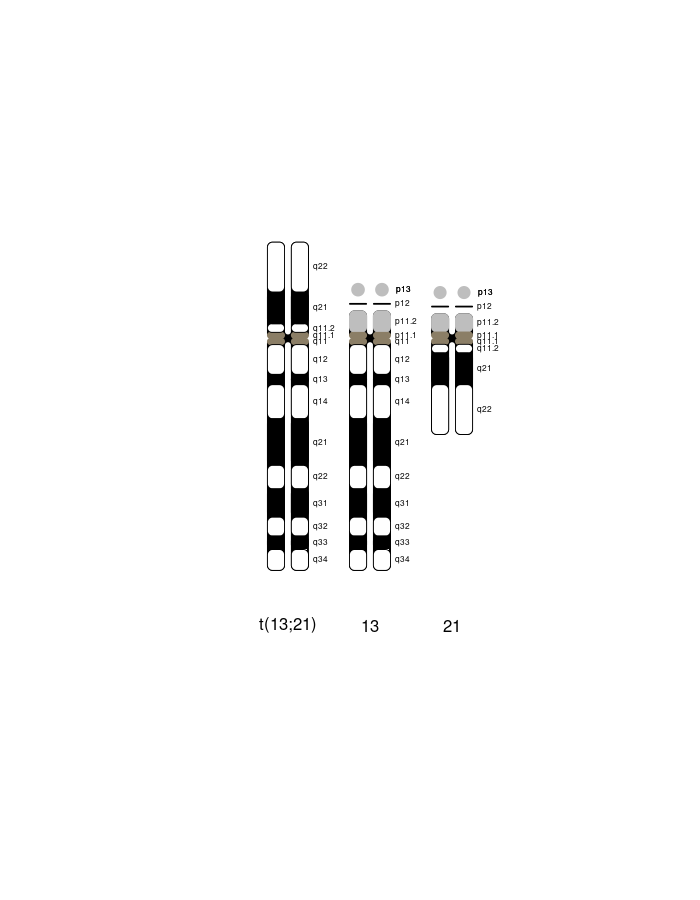

In [15]:
options(repr.plot.width = 7, repr.plot.height = 9, repr.plot.res = 100)

suppressMessages(
plotIdiograms(humChr1321der,                # data.frame of size of chr.
              dfMarkPos = humMarkPos1321Der,# d.f of position of marks
              dfMarkColor = humMarkColor,   # d.f of style of marks
              
              addOTUName = FALSE,          # do not add OTU name
              
              autoCenSize = FALSE,
              
              centromereSize=0,            # apparent size of centromere
              roundness=5,                 # roundness of vertices of chr. and marks
              chrColor = "black",          # chr. color
              classChrName = "",           # string for naming chr.
              karHeight = 4,               # karyotype height without spacing
              
              chrIndex = "",               # do not add chr. indices
              morpho = "",                 # do not add chr. morphology
              karIndex = FALSE,            # do not add karyotype indices
              distTextChr = 2,             # distance from chr. to text.

              markLabelSize = .5,          # font size of chr. mark labels
              legend = "inline",           # mark labels next to chr.
              pattern="chr[0-9]+",         # REGEX pattern to remove from mark names
              lwd.chr=.9,                  # width of chr and mark borders
              
              ruler=FALSE,
              
              ylimBotMod = -.15            # modify ylim bottom argument
              ,asp=1                       # y x aspect ratio
              )
    )

## function `robert`

This procedure transforms the data of long arms of the chromosomes 13 and 14 from data.frames of chr. and marks in a derivative [@Robertson1916].

We can do any Robertsonian translocation using:


In [12]:
chrt13q14q<-robert(humChr,humMarkPos,13,14,"q","q")

# which produces a list of two data.frames:

# 1. chr. sizes
dfChrSizeDer<-chrt13q14q$dfChrSizeDer
# remove the group column
dfChrSizeDer<-dfChrSizeDer[ , !(names(dfChrSizeDer) %in% "group")]

# 2. marks' positions
dfMarkPosDer<-chrt13q14q$dfMarkPosDer

head(dfMarkPosDer)

,chrName,markName,chrRegion,markDistCen,markSize,OTU
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
613,t(13;14)(q10:q10),chr14q11.1,p,0.000,0.125,otu3
713,t(13;14)(q10:q10),chr14q11.2,p,0.125,0.330,otu3
813,t(13;14)(q10:q10),chr14q12,p,0.455,0.335,otu3
913,t(13;14)(q10:q10),chr14q13,p,0.790,0.305,otu3
1013,t(13;14)(q10:q10),chr14q21,p,1.095,0.600,otu3
1113,t(13;14)(q10:q10),chr14q22,p,1.695,0.330,otu3


</div>

<div class="verysmall">

### plot of t(13;14) 

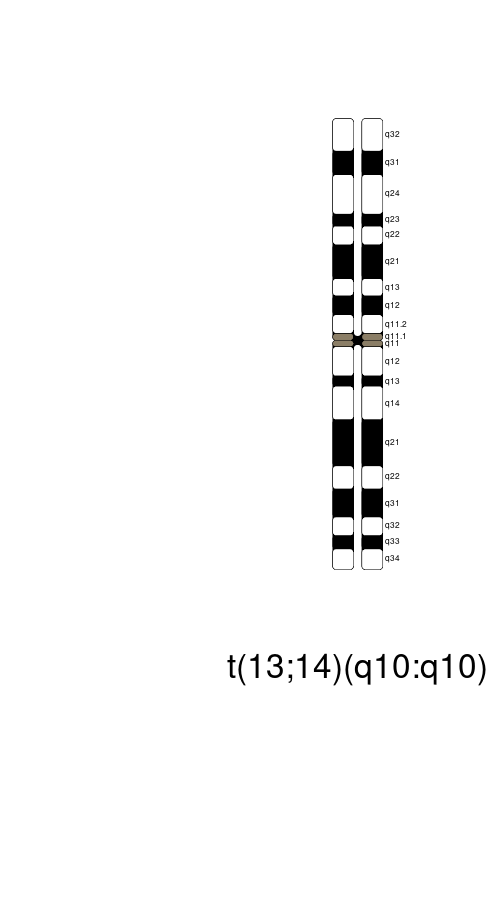

In [16]:

par(mar=c(0,2,.5,0))
options(repr.plot.width = 5, repr.plot.height = 9, repr.plot.res = 100)

suppressMessages(
plotIdiograms(dfChrSizeDer,               # data.frame of chromosome size
              dfMarkPos = dfMarkPosDer,   # df of mark positions
              dfMarkColor = humMarkColor, # df of mark characteristics (in package)

              addOTUName = FALSE,         # do not add name of OTU
              karIndex = FALSE,           # do not add karyotype indices
              morpho = "",                # do not add morphological categories
              chrIndex = "",              # do not add chromosome indices
              classChrName = "",          # string for naming chr.
              
              chrColor = "black",         # chr. color
              chrWidth = 1,               # chromosome width
              karHeight = 9,              # kar. height without space
              
              autoCenSize = FALSE,
              
              centromereSize = 0,         # apparent centromere size
              squareness = 7,             # squareness of chr. and marks

              markLabelSize = .5,         # size of legend font
              legend = "inline",          # mark labels next to chr.
              pattern= "chr[0-9XY]+",     # REGEX pattern to remove from name of marks
              distTextChr = 6,            # distance from chr. to text.
              indexIdTextSize = 2,        # font size of chr name and indices
              lwd.chr=.5,                 # width of chr and mark borders
              colorBorderMark = "black",  # force color of border of marks 
              
              ruler= FALSE
              
              ,xlimLeftMod = 4            # space to the right of karyotype
)
)